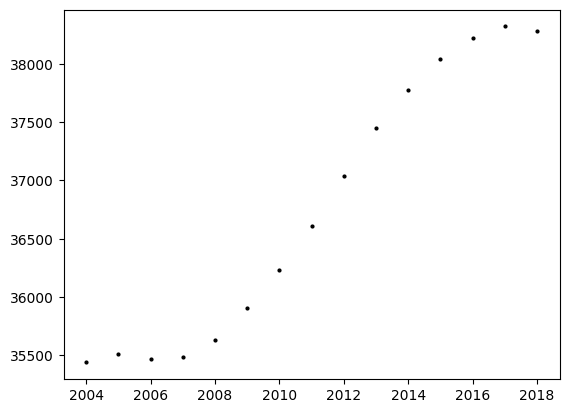

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

t, N = np.loadtxt('datos-sigmoide.dat', usecols=(0,1), unpack=True)
plt.plot(t,N, 'ok', markersize=2)

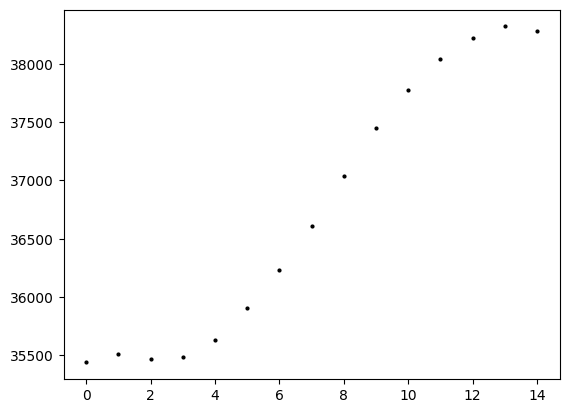

In [63]:
t=t-t.min()
plt.plot(t,N, 'ok', markersize=2)

In [64]:
N0=N[0]
K_list = np.linspace(max(N)+1, 10**15, 10**5)
N2 = np.zeros(len(N))
r_list = []
t=t.reshape((-1,1))
for K in K_list:
    for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i]))
    model = LinearRegression().fit(t, N2)
    r_list.append(model.score(t, N2))


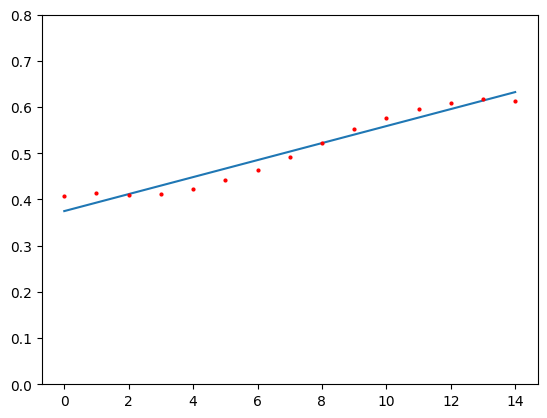

K= 59000
R^2= 0.9492226497848529
r= 0.0184


In [ ]:
#K=K_list[np.argmax(r_list)]
K=59000
for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i]))
model = LinearRegression().fit(t, N2)
#r=model.coef_[0]
r=0.0184
t_part = np.linspace(t.min(),t.max(), 10**6)
C=model.intercept_
#C=np.log(N0/(K-N0))
#C=0.375
recta=[]
for t in t_part:
     recta.append(C+t*r)
plt.plot(t_part,recta)
plt.plot(t,N2, 'or', markersize=2)
plt.ylim(0,0.8)
plt.show()
print('K=', K)
print('R^2=', max(r_list))
print('r=', r)

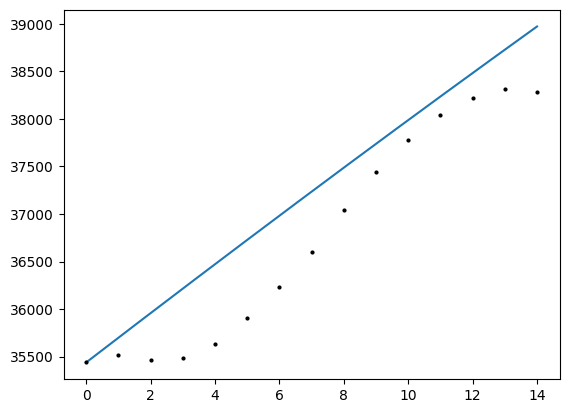

In [ ]:
sigmoide = np.zeros(len(t_part))
for i in range(len(t_part)):
    sigmoide[i]=(K*N0)/(N0+(K-N0)*np.exp(-r*t_part[i]))
plt.plot(t_part, sigmoide)
plt.plot(t,N, 'ok', markersize=2)
plt.savefig('sig_aprox.png')
